# U.S. Medical Insurance Costs

## Summary

The purpose of this project is to extrapolate and visualize data pertaining to the cost of medical insurance of individuals in the United States. There are various sections and comparisons included in this notebook, but the functions are designed with flexibility, allowing someone with a different medical insurance dataset to extrapolate data from their own individual csv.

From this dataset, I have calculated and visualized some example comparisons in regards to the below:

- Difference in cost between Females and Males

- Difference in cost between Smokers and Nonsmokers

- Average insurance cost per location in the United States

## Imports and functions

In this next section we will define the imported modules and data as well as the functions we will be using throughout this project.

### Module and Data Import

In this project we will be using various modules, primarily for interacting with a csv file full of data. These libraries include csv, math, pandas, numpy, and matplotlib with the pyplot method. 

In [20]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'..\\us_med_insurance_analysis\insurance.csv')



### Global Functions

The functions below will be used throughout the notebook for the calculation and visualization of data. The function requirements include:

- Being able to calculate the average cost of insurance for a demographic
- Plotting Cost vs Age on a scatter plot for different demographics and calculating a linear regression model
- Create a bar graph comparing the average cost between unique values within a demographic
- Calculating the difference in average cost between two subsets of a demographic

In [21]:
#Functions for extrapolating data

#returns the average insurance cost with the ability to filter by category
def avg_demog(ins_list, category=None, filter_sort=None):
    total_charges = 0
    temp_list = []
    if category == None and filter_sort == None:
        temp_list = [charge for charge in ins_list.charges]
        for item in temp_list:
            total_charges += item
    else:
        filtered_list = df[df[category] == filter_sort]
        temp_list = [charge for charge in filtered_list.charges]
        for item in temp_list:
            total_charges += item
    return total_charges / len(temp_list)

#Shows a scatter plot comparing age and cost with the ability to filter by category   
def charge_scatter_age_demog(df, category, filter_sort):
    temp_dataset = df[df[category] == filter_sort]

    x = np.array(temp_dataset['age'])

    y = np.array(temp_dataset['charges'])

    plt.plot(x, y,'o')

    m, b = np.polyfit(x, y, 1)

    plt.plot(x, m*x + b)

    plt.xlabel('Age')
    plt.ylabel('Cost')
    plt.title('Cost of Insurance vs Age for the {} {}'.format(filter_sort, category))

    plt.show()

    print('The regression model for the cost of insurance for {} {} is:'.format(filter_sort, category))
    print('y = {}*x + {}'.format(m, b))

 #Creates a comparison scatter plot between two demographics along with line of best fit

def scatter_compare_age_cost(df, category, filter_one, filter_two):
    dataset_one = df[df[category] == filter_one]
    dataset_two = df[df[category] == filter_two]

    x_one = np.array(dataset_one['age'])
    y_one = np.array(dataset_one['charges'])
    m_one, b_one = np.polyfit(x_one, y_one, 1)
    x_two = np.array(dataset_two['age'])
    y_two = np.array(dataset_two['charges'])
    m_two, b_two = np.polyfit(x_two, y_two, 1)

    plt.scatter(x_one, y_one, c='r', marker='o', label=filter_one)
    plt.plot(x_one, m_one*x_one + b_one)

    plt.scatter(x_two, y_two, c='b', marker='s', label=filter_two)
    plt.plot(x_two, m_two*x_two + b_two)

    plt.legend(loc='upper left')

    plt.show()

#Create a bar chart comparing the average cost for an unlimited amount of arguments
def avg_compare_category_bar(df, category):
    avg_dict = {}
    for item in df[category].unique():
        avg_dict[item] = avg_demog(df, category, item)
    
    plt.bar(range(len(avg_dict)), list(avg_dict.values()), align='center')
    plt.xticks(range(len(avg_dict)), list(avg_dict.keys()))
    plt.title('Average cost per {}'.format(category))
    plt.show()

#Calculate the difference in cost between two subsets of a category and return the absolute value
def avg_difference(df, category, filter_one, filter_two):
    avg_one = avg_demog(df, category, filter_one)
    avg_two = avg_demog(df, category, filter_two)

    cost_difference = abs(avg_one - avg_two)
    return cost_difference





## Cost of insurance for Females vs Males

In this section we can observe the average costs of insurance for each sex as well as visualize the distribution of costs. The below functions also calculate a linear regression model that we may find useful for calculating the cost of insurance for unknown ages.

### Females

Below is a scatter plot showing the insurance costs vs age of the female demographic:


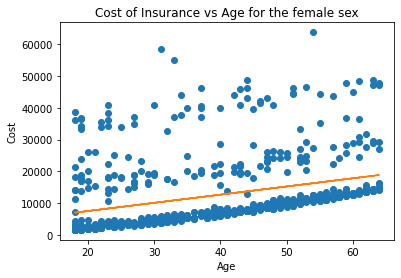

The regression model for the cost of insurance for female sex is:
y = 257.0114899339651*x + 2416.8485216856216

The average cost of insurance for a male in the US is $12569.58


In [22]:
charge_scatter_age_demog(df, 'sex','female')
print('\nThe average cost of insurance for a male in the US is ${}'.format(round(avg_demog(df,'sex','female'), 2)))

### Males

Below is a scatter plot showing the age vs cost of the male demographic:

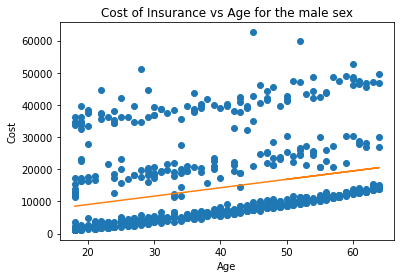

The regression model for the cost of insurance for male sex is:
y = 260.6813392106613*x + 3811.7738523460434

The average cost of insurance for a male in the US is $13956.75


In [23]:
charge_scatter_age_demog(df, 'sex', 'male')
print('\nThe average cost of insurance for a male in the US is ${}'.format(round(avg_demog(df,'sex','male'), 2)))

### Females vs. Males

Below is a bar graph comparing the insurance cost difference between Males and Females:

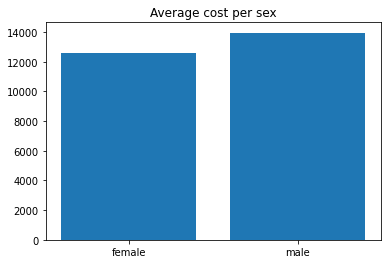

Insurance for males in the US is $1387.17 higher than females


In [24]:
avg_compare_category_bar(df, 'sex')
print('Insurance for males in the US is ${} higher than females'.format(round(abs(avg_difference(df, 'sex', 'female', 'male')), 2)))

## Smokers vs. Nonsmokers

The purpose of this section is to compare the cost averages between a different category in our data, smokers and nonsmokers. 

### Smokers

Below is a scatter plot displaying the age vs cost of the Smokers demographic:

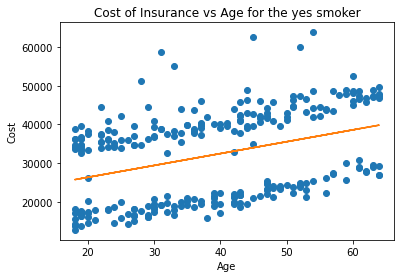

The regression model for the cost of insurance for yes smoker is:
y = 305.2376021098287*x + 20294.128126915966

The average cost of insurance for a smoker in the US is $32050.23


In [25]:
charge_scatter_age_demog(df, 'smoker', 'yes')
print('\nThe average cost of insurance for a smoker in the US is ${}'.format(round(avg_demog(df,'smoker','yes'), 2)))

### Nonsmoker

Below is a scatter plot displaying the age vs cost of the Nonsmoker demographic:

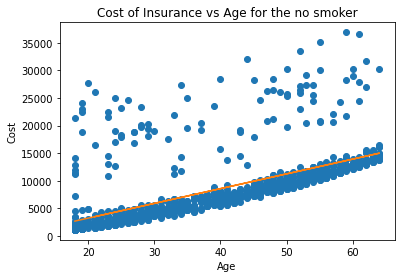

The regression model for the cost of insurance for no smoker is:
y = 267.2489128311996*x + -2091.420556565088

The average cost of insurance for a nonsmoker in the US is $8434.27


In [26]:
charge_scatter_age_demog(df, 'smoker', 'no')
print('\nThe average cost of insurance for a nonsmoker in the US is ${}'.format(round(avg_demog(df,'smoker','no'), 2)))

### Smoker vs Nonsmoker

Below is a bar graph showing the difference in insurance cost between the Smoker and Nonsmoker demographic:

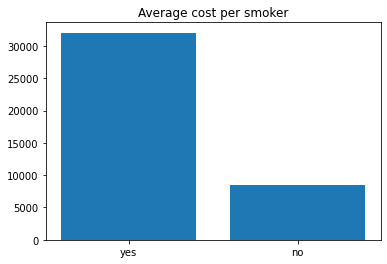

Insurance for smokers in the US is $23615.96 higher than nonsmokers

There are a total of 274 smokers vs 1064 nonsmokers in the US


In [27]:
avg_compare_category_bar(df, 'smoker')
print('Insurance for smokers in the US is ${} higher than nonsmokers'.format(round(abs(avg_difference(df, 'smoker', 'yes', 'no')), 2)))
print('\nThere are a total of {} smokers vs {} nonsmokers in the US'.format(len(df[df['smoker'] == 'yes']), len(df[df['smoker'] == 'no'])))

## Insurance Cost Comparison by Region

The purpose of this section is to visualize and compare the insurance costs of each region of the US in our dataset. 

Below you can see a bar graph comparing the cost of each of our unique regions:

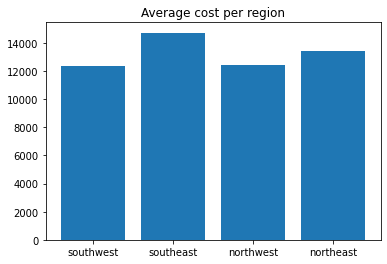

In [28]:
avg_compare_category_bar(df, 'region')

## Conclusions

The purpose of this last section is to draw conclusions from our calculations and visualizations of our included dataset. While these are not the only conclusions that we can infer, they are the observations that I personally had the goal of discovering when defining the scope of this project. These functions can be used and expanded to draw further conclusions based on the needs of an individual surveying a csv file of insurance cost data.

### My Observations

Insurance tends to be more expensive for Males than Females by an average amount of $1,387.13.

Insurance tends to be more expensive for Smokers than Nonsmokers by an average amount of $23615.96.

The least expensive region to have medical insurance in the US is the Southwest while the most expensive region is the Southeast.

There are around 3-4 times as many Nonsmokers as Smokers in the US that have medical insurance.